In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import pandas as pd

/tmp/ipykernel_2396023/2817862154.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('experiment_results/vanilla.csv')
df.head()

,dataset,algo,use_contrastive,seed,agent_id,avg_acc,final_acc,forward,backward,catastrophic
0,mnist,modular,False,seed_3,agent_1,0.952020,0.949610,0.807879,0.034172,-0.174025
1,mnist,modular,False,seed_3,agent_6,0.956262,0.951423,0.823254,0.032295,0.146214
2,mnist,modular,False,seed_3,agent_2,0.950844,0.955103,0.746659,0.032802,-0.050309
3,mnist,modular,False,seed_3,agent_5,0.950681,0.946543,0.768949,0.033302,0.032473
4,mnist,modular,False,seed_3,agent_7,0.958991,0.957205,0.802373,0.034451,-0.239448


In [3]:
df[(df['algo'] == 'modular') & (df['dataset'] == 'cifar100') & (df['use_contrastive'] == False)]

,dataset,algo,use_contrastive,seed,agent_id,avg_acc,final_acc,forward,backward,catastrophic


In [4]:
df[(df['algo'] == 'modular') & (df['dataset'] == 'cifar100') & (df['use_contrastive'] == True)]

,dataset,algo,use_contrastive,seed,agent_id,avg_acc,final_acc,forward,backward,catastrophic


In [5]:
m = df.groupby(["algo", "dataset", "use_contrastive"])[
      "final_acc"].mean()
stderr = df.groupby(["algo", "dataset", "use_contrastive"])["final_acc"].sem()
# stderr = df.groupby(["algo", "dataset", "use_contrastive"])["final_acc"].std()
m

algo        dataset       use_contrastive
modular     fashionmnist  False              0.939948
                          True               0.938534
            kmnist        False              0.829986
                          True               0.851872
            mnist         False              0.949709
                          True               0.958443
monolithic  fashionmnist  False              0.922384
                          True               0.923408
            kmnist        False              0.789461
                          True               0.827864
            mnist         False              0.918061
                          True               0.953293
Name: final_acc, dtype: float64

In [6]:
stderr

algo        dataset       use_contrastive
modular     fashionmnist  False              0.002848
                          True               0.002893
            kmnist        False              0.003601
                          True               0.003784
            mnist         False              0.001697
                          True               0.001284
monolithic  fashionmnist  False              0.003996
                          True               0.004537
            kmnist        False              0.004066
                          True               0.004200
            mnist         False              0.004147
                          True               0.001546
Name: final_acc, dtype: float64

In [7]:
# modular_means when algo == "modular" and use_contrastive == False
datasets = ['mnist', 'fashionmnist', 'kmnist', 'cifar100']
# datasets = ['cifar100']

modular_means = [m[('modular', dataset, False)] for dataset in datasets]
modular_stderr = [stderr[('modular', dataset, False)] for dataset in datasets]

modular_contrastive_means = [m[('modular', dataset, True)] for dataset in datasets]
modular_contrastive_stderr = [stderr[('modular', dataset, True)] for dataset in datasets]

monolithic_means = [m[('monolithic', dataset, False)] for dataset in datasets]
monolithic_stderr = [stderr[('monolithic', dataset, False)] for dataset in datasets]

monolithic_contrastive_means = [m[('monolithic', dataset, True)] for dataset in datasets]
monolithic_contrastive_stderr = [stderr[('monolithic', dataset, True)] for dataset in datasets]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/vlongle/miniconda3/envs/shell/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'cifar100'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/index.pyx", line 774, in pandas._libs.index.BaseMultiIndexCodesEngine.get_loc
  File "/home/vlongle/miniconda3/envs/shell/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3804, in get_loc
    raise KeyError(key) from err
KeyError: 'cif

NameError: name 'modular_means' is not defined

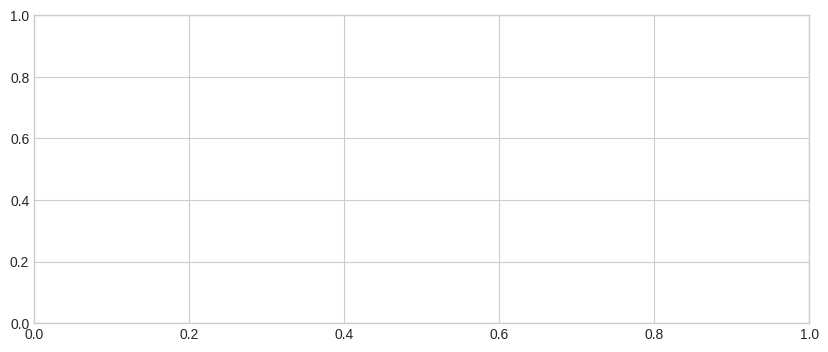

In [8]:


# Set colors
modular_color = '#3182bd'
modular_contrastive_color = '#9ecae1'
monolithic_color = '#de2d26'
monolithic_contrastive_color = '#fc9272'


# modular_color = '#340b96'
# modular_contrastive_color = '#700ba2'
# monolithic_color = '#f19249'
# monolithic_contrastive_color = '#f47c4c'



# Set figure size
fig, ax = plt.subplots(figsize=(10,4))

# Plot data
bar_width = 0.2
opacity = 0.8

# fake ChatGPT data
# modular_means = [93.5, 90.8, 93.7, 71.3, 91.8, 76.4]
# modular_std = [1.1, 0.8, 0.5, 1.2, 0.5, 1.4]

# actual data
# modular_means = [93.5, 90.8, 93.7, 71.3, 91.8, 76.4]
# modular_std = [1.1, 0.8, 0.5, 1.2, 0.5, 1.4]

# modular_contrastive_means = [94.2, 91.6, 93.9, 74.5, 93.4, 77.5]
# modular_contrastive_std = [0.9, 0.7, 0.6, 1.1, 0.7, 1.1]

# monolithic_means = [92.6, 89.4, 92.7, 68.1, 91.0, 74.8]
# monolithic_std = [0.7, 0.9, 0.6, 1.1, 0.8, 0.9]

# monolithic_contrastive_means = [94.3, 91.7, 94.2, 74.8, 94.0, 79.3]
# monolithic_contrastive_std = [0.8, 0.6, 0.4, 0.8, 0.5, 0.9]

linewidth = 2

rects1 = ax.bar(np.arange(len(modular_means))-bar_width, modular_means, bar_width,
                yerr=modular_stderr, alpha=opacity, color=modular_color, label='Modular',
                edgecolor='#214073',
                 linewidth=linewidth,
              )
rects2 = ax.bar(np.arange(len(modular_contrastive_means)), modular_contrastive_means, bar_width,
                yerr=modular_contrastive_stderr, alpha=opacity, color=modular_contrastive_color, label='Modular + Contrastive',
                edgecolor='#6a9bbd',
                 linewidth=linewidth,
                )
rects3 = ax.bar(np.arange(len(monolithic_means))+bar_width, monolithic_means, bar_width,
                yerr=monolithic_stderr, alpha=opacity, color=monolithic_color, label='Monolithic',
                edgecolor='#a6221f',
                                linewidth=linewidth,)
rects4 = ax.bar(np.arange(len(monolithic_contrastive_means))+bar_width*2, monolithic_contrastive_means, bar_width,
                yerr=monolithic_contrastive_stderr, alpha=opacity, color=monolithic_contrastive_color, label='Monolithic + Contrastive',
                 edgecolor='#d4756d',
                 linewidth=linewidth,
                 )


datasets = ['MNIST', 'FashionMNIST', 'KMNIST', 'CIFAR-100']
# datasets = ['CIFAR-100']
# datasets = ['MNIST', 'FashionMNIST', 'KMNIST', 'CIFAR-100', 'Gridworld', 'Composuite']
x = np.arange(len(datasets))
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylim([0.5, 1])
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Dataset', fontsize=14)
# leg = ax.legend(frameon=True)
# leg.get_frame().set_edgecolor('b')

ax.set_title('Comparison of Algorithm Performance', fontsize=16, fontweight='bold')


# ax.legend(frameon=True, loc='lower center')
ax.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.28, 0.0));
ax.grid(True, which='major', linestyle='--', alpha=0.5);
plt.savefig(f"Figures/vanilla/results.pdf", bbox_inches="tight")
# plt.tight_layout()
# https://arxiv.org/pdf/2303.03378.pdf, color around box, see Figure 6

In [ ]:
modular_contrastive_means

In [ ]:
monolithic_contrastive_means